In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## Want to ensure the right output paths

In [2]:
output_path = '../output_vids/cropped_player.jpg'
image = cv2.imread(output_path)
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

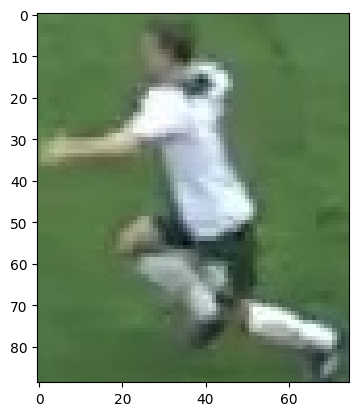

In [3]:
plt.imshow(image)
plt.show()

### This is to check the shirt color and then cluster
`top_half = image[0: int(image.shape[0] //2), : ]`

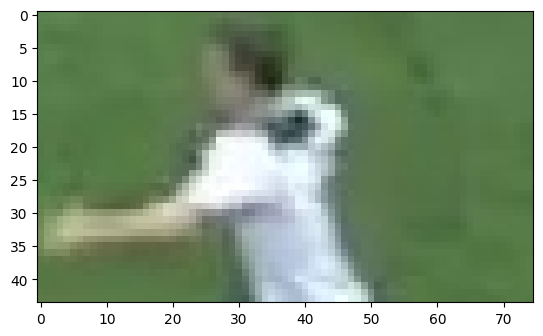

In [4]:
top_half= image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half)
plt.show()

In [5]:
image_2d = top_half.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


### Plot the clusters within the image.

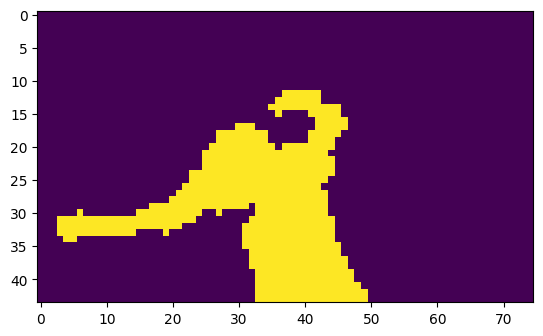

In [6]:
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [8]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


### Using Corner of the image to assign label based on shirt color.

In [10]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [11]:
kmeans.cluster_centers_[player_cluster]

array([198.1732852 , 209.51624549, 211.20577617])